In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
import numpy as np
from scipy.linalg import circulant, dft




In [11]:
#   Q4  - a
def gerar_onda_amostrada(t):
    # Cria uma onda amostrada
    return np.piecewise(t, [t < 0.5, t >= 0.5], [lambda t: np.sin(10 * np.pi * t), 1])

def criar_pulso(M, N):
    # Cria um pulso de largura M em um vetor de tamanho N
    pulso = np.zeros(N)
    pulso[:M] = 1/M
    return pulso

def calcular_convolucao_circular(x, y):
    # Calcula a convolução circular de x e y
    X = fft(x)
    Y = fft(y)
    resultado_convolucao = ifft(X * Y)
    return np.real(resultado_convolucao)


In [12]:

# Parâmetros
N = 256
vetor_tempo = np.linspace(0, 1, N, endpoint=False)

# Valores de M para os quais queremos calcular a convolução circular
larguras_pulso = [256, 100, 50, 20, 10, 5, 1]

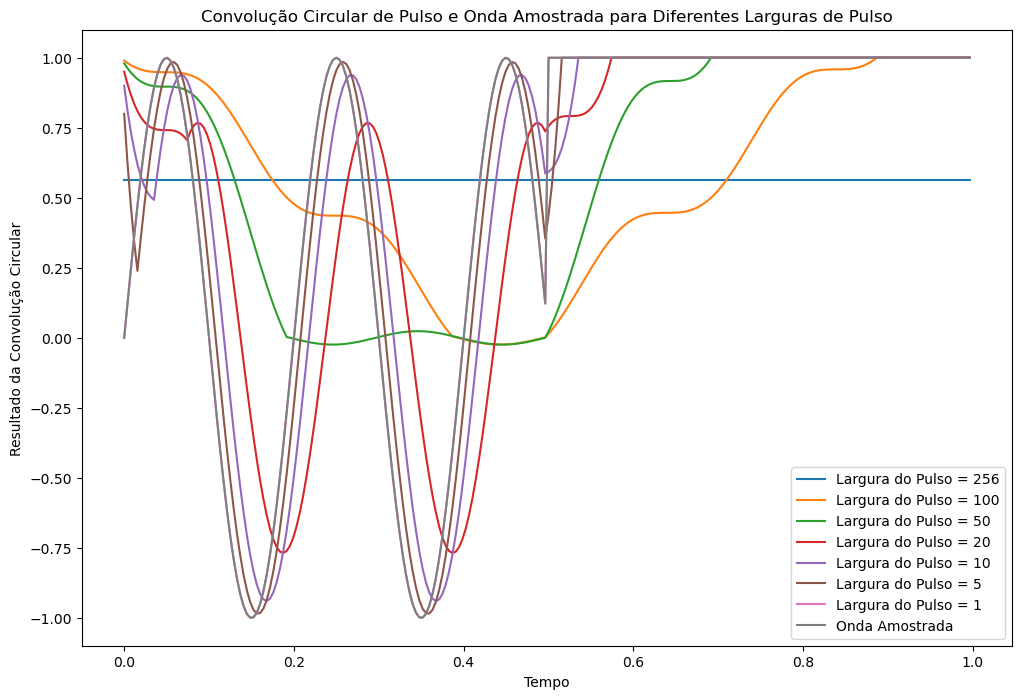

In [13]:

# Plotagem
plt.figure(figsize=(12, 8))

for largura_pulso in larguras_pulso:
    onda_amostrada = gerar_onda_amostrada(vetor_tempo)
    pulso = criar_pulso(largura_pulso, N)
    resultado = calcular_convolucao_circular(pulso, onda_amostrada)

    plt.plot(vetor_tempo, resultado, label=f'Largura do Pulso = {largura_pulso}')

plt.plot(vetor_tempo, onda_amostrada, label='Onda Amostrada')
plt.legend()
plt.title('Convolução Circular de Pulso e Onda Amostrada para Diferentes Larguras de Pulso')
plt.xlabel('Tempo')
plt.ylabel('Resultado da Convolução Circular')
plt.show()


In [14]:
#   Q5  -


h = np.array([1, 2j, -3, -4j])
H = np.fft.fft(h)
Mh = circulant(h)
eigenvalues, eigenvectors = np.linalg.eig(Mh)
verification_results = []

In [15]:
for i in range(len(eigenvalues)):
    k = i 
    En_k = dft(4, scale='sqrtn')[:, k]  
    eigenvalue = H[k]  

    
    normalized_eigenvector = eigenvectors[:, i] / np.linalg.norm(eigenvectors[:, i])

    verification_results.append({
        'Eigenvalue Match': np.isclose(eigenvalue, eigenvalues[i]),
        'Eigenvector Match': np.allclose(normalized_eigenvector, En_k),
        'Eigenvalue': eigenvalue,
        'Calculated Eigenvalue': eigenvalues[i],
        'Eigenvector': En_k,
        'Calculated Eigenvector': normalized_eigenvector
    })

In [16]:

for result in verification_results:
    print(f"Eigenvalue Match: {result['Eigenvalue Match']}")
    print(f"Eigenvector Match: {result['Eigenvector Match']}")
    print(f"Eigenvalue: {result['Eigenvalue']}")
    print(f"Calculated Eigenvalue: {result['Calculated Eigenvalue']}")
    print(f"Eigenvector: {result['Eigenvector']}")
    print(f"Calculated Eigenvector: {result['Calculated Eigenvector']}")
    print("\n")

Eigenvalue Match: False
Eigenvector Match: False
Eigenvalue: (-2-2j)
Calculated Eigenvalue: (10+2.220446049250313e-16j)
Eigenvector: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
Calculated Eigenvector: [-5.00000000e-01-3.21528781e-16j  2.36441654e-16-5.00000000e-01j
  5.00000000e-01+0.00000000e+00j -6.14916147e-17+5.00000000e-01j]


Eigenvalue Match: False
Eigenvector Match: False
Eigenvalue: (10+0j)
Calculated Eigenvalue: (-1.999999999999998-1.9999999999999978j)
Eigenvector: [ 5.00000000e-01+0.000000e+00j  3.06161700e-17-5.000000e-01j
 -5.00000000e-01-6.123234e-17j -9.18485099e-17+5.000000e-01j]
Calculated Eigenvector: [0.5-5.35442487e-16j 0.5+3.82175549e-16j 0.5+0.00000000e+00j
 0.5+3.61379156e-16j]


Eigenvalue Match: True
Eigenvector Match: False
Eigenvalue: (-2+2j)
Calculated Eigenvalue: (-2.000000000000001+1.999999999999999j)
Eigenvector: [ 0.5+0.0000000e+00j -0.5-6.1232340e-17j  0.5+1.2246468e-16j
 -0.5-1.8369702e-16j]
Calculated Eigenvector: [-0.5+2.19770898e-16j  0.5+0.00000000e+00j -0.5

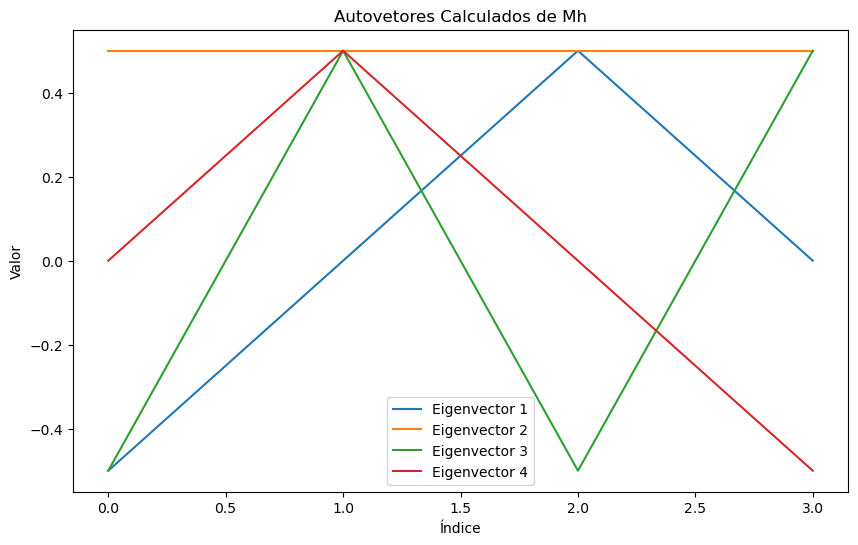

In [17]:
# plt Q5
plt.figure(figsize=(10, 6))
for i in range(len(eigenvalues)):
    plt.plot(np.real(eigenvectors[:, i]), label=f'Eigenvector {i + 1}')

plt.title('Autovetores Calculados de Mh')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [18]:
#   Q6 -
k = np.arange(0, 1000)
magnitude_Hk = np.sqrt((1/2)**2 + (-1/2 * np.cos(2 * np.pi / len(k) * k))**2)
fase_Hk = np.arctan2(-1/2 * np.sin(2 * np.pi / len(k) * k), 1/2)


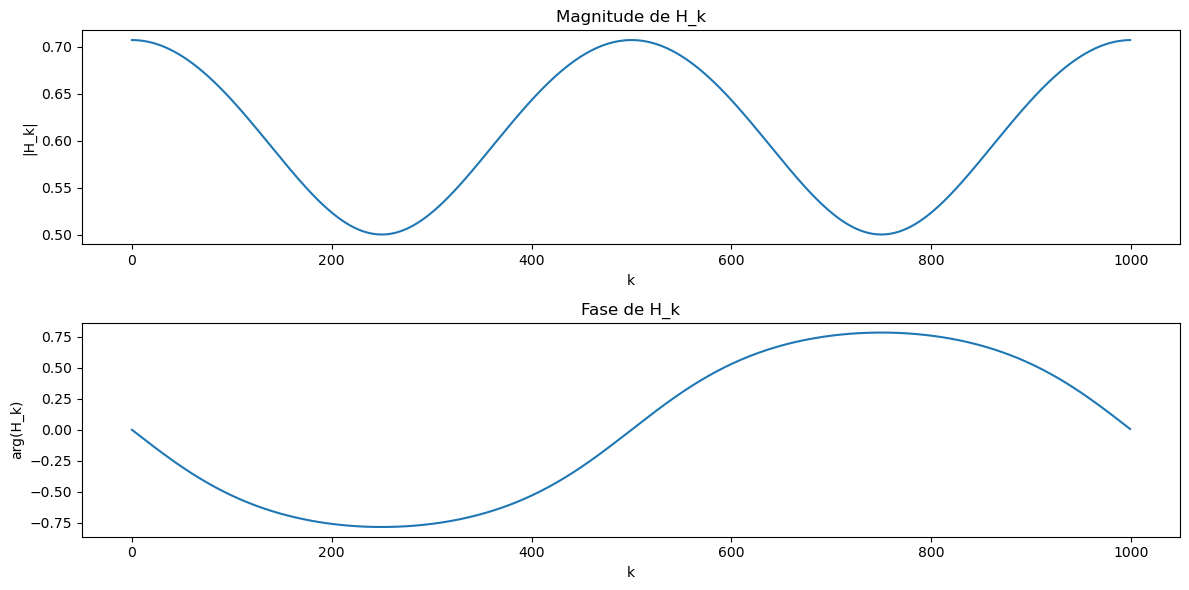

In [19]:

# Plotando os gráficos
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(k, magnitude_Hk)
plt.title('Magnitude de H_k')
plt.xlabel('k')
plt.ylabel('|H_k|')

plt.subplot(2, 1, 2)
plt.plot(k, fase_Hk)
plt.title('Fase de H_k')
plt.xlabel('k')
plt.ylabel('arg(H_k)')

plt.tight_layout()
plt.show()

In [20]:
# A classificação "passa-altas" refere-se ao fato de que o filtro permite a passagem de frequências altas (positivas) enquanto atenua as frequências baixas. Neste caso, a mudança de fase indica uma atenuação maior para as frequências mais baixas. Portanto, o filtro é considerado um filtro passa-altas.
